# Force Alignment using CTC

Forced alignment is a technique to take an orthographic transcription of an audio file and generate a time-aligned version. In this example, I am going to use Malay CTC model.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/force-alignment-ctc](https://github.com/huseinzol05/malaya-speech/tree/master/example/force-alignment-ctc).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline
import IPython.display as ipd
import matplotlib.pyplot as plt
from malaya_speech.utils.aligner import plot_alignments

`pyaudio` is not available, `malaya_speech.streaming.pyaudio` is not able to use.


### List available CTC models

In [3]:
malaya_speech.force_alignment.ctc.available_transformer()

,Size (MB),Quantized Size (MB),malay-malaya,Language
hubert-conformer-tiny,36.6,10.3,"{'WER': 0.238714008166, 'CER': 0.060899814, 'W...",[malay]
hubert-conformer,115,31.1,"{'WER': 0.2387140081, 'CER': 0.06089981404, 'W...",[malay]
hubert-conformer-large,392,100,"{'WER': 0.2203140421, 'CER': 0.0549270416, 'WE...",[malay]


### Load CTC Aligner model

```python
def transformer(
    model: str = 'hubert-conformer', quantized: bool = False, **kwargs
):
    """
    Load Encoder-CTC ASR model.

    Parameters
    ----------
    model : str, optional (default='hubert-conformer')
        Check available models at `malaya_speech.force_alignment.ctc.available_transformer()`.
    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model.
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result : malaya_speech.model.wav2vec.Wav2Vec2_Aligner class
    """
```

In [4]:
model = malaya_speech.force_alignment.ctc.transformer(model = 'hubert-conformer')

2023-03-06 15:37:35.282571: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 15:37:35.305928: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-06 15:37:35.305961: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: husein-MS-7D31
2023-03-06 15:37:35.305965: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: husein-MS-7D31
2023-03-06 15:37:35.306047: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.161.3
2023-03-06 15:37:35.306062: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported vers

### Load sample

#### Malay samples

In [5]:
malay1, sr = malaya_speech.load('speech/example-speaker/shafiqah-idayu.wav')
malay2, sr = malaya_speech.load('speech/example-speaker/haqkiem.wav')

In [6]:
texts = ['nama saya shafiqah idayu',
        'sebagai pembangkang yang matang dan sejahtera pas akan menghadapi pilihan raya umum dan tidak menumbang kerajaan dari pintu belakang']

In [7]:
ipd.Audio(malay2, rate = sr)

### Predict

```python
def predict(self, input, transcription: str, sample_rate: int = 16000):
    """
    Transcribe input, will return a string.

    Parameters
    ----------
    input: np.array
        np.array or malaya_speech.model.frame.Frame.
    transcription: str
        transcription of input audio.
    sample_rate: int, optional (default=16000)
        sample rate for `input`.
    Returns
    -------
    result: Dict[chars_alignment, words_alignment, alignment]
    """
```

#### Predict Malay

Our original text is: 'sebagai pembangkang yang matang dan sejahtera pas akan menghadapi pilihan raya umum dan tidak menumbang kerajaan dari pintu belakang'

In [8]:
results = model.predict(malay2, texts[1])

2023-03-06 15:37:45.494170: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 53942272 exceeds 10% of free system memory.
2023-03-06 15:37:45.523388: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 53942272 exceeds 10% of free system memory.
2023-03-06 15:37:45.533111: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 53942272 exceeds 10% of free system memory.
2023-03-06 15:37:45.537104: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 53942272 exceeds 10% of free system memory.
2023-03-06 15:37:45.560074: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 53942272 exceeds 10% of free system memory.


In [9]:
results.keys()

dict_keys(['chars_alignment', 'words_alignment', 'alignment'])

In [10]:
results['words_alignment']

[{'text': 'sebagai',
  'start': 0.10013914233576643,
  'end': 0.5006957116788322,
  'start_t': 5,
  'end_t': 25,
  'score': 0.3489727854749466},
 {'text': 'pembangkang',
  'start': 0.560779197080292,
  'end': 1.121558394160584,
  'start_t': 28,
  'end_t': 56,
  'score': 0.3905156936487866},
 {'text': 'yang',
  'start': 1.2016697080291971,
  'end': 1.321836678832117,
  'start_t': 60,
  'end_t': 66,
  'score': 0.6657784879221825},
 {'text': 'matang',
  'start': 1.4219758211678832,
  'end': 1.7824767335766425,
  'start_t': 71,
  'end_t': 89,
  'score': 0.3326612651595179},
 {'text': 'dan',
  'start': 1.8625880474452556,
  'end': 2.002782846715329,
  'start_t': 93,
  'end_t': 100,
  'score': 0.42831442185974067},
 {'text': 'sejahtera',
  'start': 2.0828941605839417,
  'end': 2.6236455291970806,
  'start_t': 104,
  'end_t': 131,
  'score': 0.3320172826619074},
 {'text': 'pas',
  'start': 2.86397947080292,
  'end': 3.064257755474453,
  'start_t': 143,
  'end_t': 153,
  'score': 0.11881570829

#### Plot alignment

```python
def plot_alignments(
    alignment,
    subs_alignment,
    words_alignment,
    waveform,
    separator: str = ' ',
    sample_rate: int = 16000,
    figsize: tuple = (16, 9),
    plot_score_char: bool = False,
    plot_score_word: bool = True,
):
    """
    plot alignment.

    Parameters
    ----------
    alignment: np.array
        usually `alignment` output.
    subs_alignment: list
        usually `chars_alignment` or `subwords_alignment` output.
    words_alignment: list
        usually `words_alignment` output.
    waveform: np.array
        input audio.
    separator: str, optional (default=' ')
        separator between words, only useful if `subs_alignment` is character based.
    sample_rate: int, optional (default=16000)
    figsize: tuple, optional (default=(16, 9))
        figure size for matplotlib `figsize`.
    plot_score_char: bool, optional (default=False)
        plot score on top of character plots.
    plot_score_word: bool, optional (default=True)
        plot score on top of word plots.
    """
```

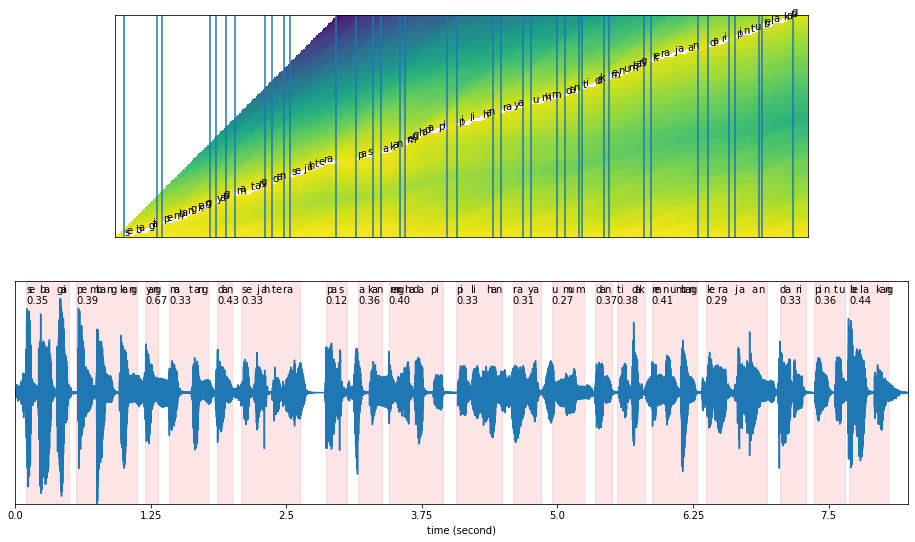

In [11]:
plot_alignments(alignment = results['alignment'],
                subs_alignment = results['chars_alignment'],
                words_alignment = results['words_alignment'],
                waveform = malay2,
                separator = ' ',
                sample_rate = 16000,
                figsize = (16, 9))

### What if we give wrong transcription?

In [15]:
results = model.predict(malay2, 'husein sangat comel')

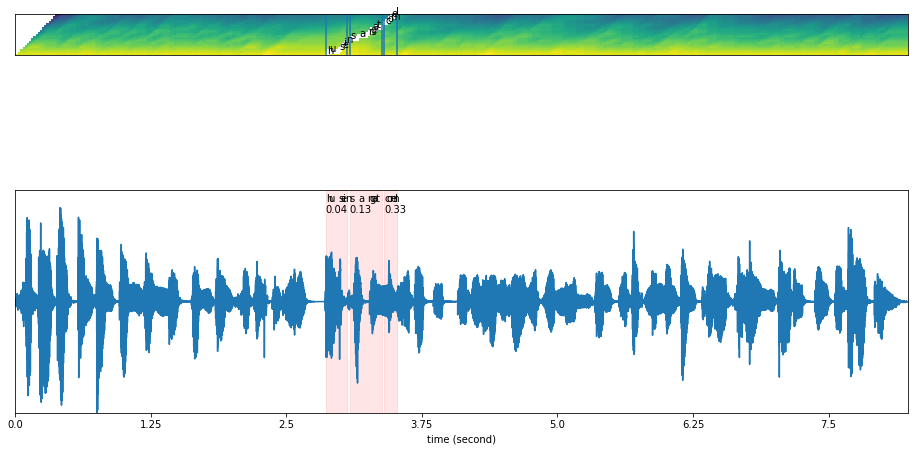

In [17]:
plot_alignments(alignment = results['alignment'],
                subs_alignment = results['chars_alignment'],
                words_alignment = results['words_alignment'],
                waveform = malay2,
                separator = ' ',
                sample_rate = 16000,
                figsize = (16, 9))

**The text output not able to align, and returned scores very low**.